In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [2]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')
 
X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv', delimiter = ',')

In [3]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

In [5]:
import tensorflow as tf
import os

In [6]:
gpus = tf.config.experimental.list_physical_devices ('CPU')
gpus

In [7]:
gpus = tf.config.experimental.list_physical_devices ('GPU')
for gpu in gpus:
    tf. config.experimental.set_memory_growth(gpu, True)

In [8]:
import cv2
import imghdr

In [9]:
data_dir = 'data'

In [10]:
#os.listdir(os.path.join(data_dir, 'Cotton'))
def read_images(directory):
    fabric_images = {}
    index = 1
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(".png"):
                fabric = os.path.relpath(root, directory)
                image_path = os.path.join(root, file)
                if fabric not in fabric_images:
                    fabric_images[fabric] = [file]
                else:
                    fabric_images[fabric].append(file)

    images = []
    for fabric, image_list in fabric_images.items():
        print(f"{index}.{fabric}: {image_list}")
        index += 1

    return images

read_images(data_dir)

In [11]:
image_exts = ['jpeg', 'jpg', 'png', 'bmp']

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')
num_classes = len(list(data.class_names))
data = data.map(lambda x, y: (x, tf.one_hot(y, num_classes)))

In [14]:
data_iterator = data.as_numpy_iterator()

In [15]:
data_iterator

In [16]:
#Get another batch from the iterator
batch = data_iterator.next() 

In [17]:
#batch
#len(batch)
#Images represented as numpy arrays
batch[0].shape

In [18]:
# Class 0 = Cotton
# Class 1 = Polyester
batch[1]

In [19]:
fig, ax = plt.subplots(nrows=8, ncols=4, figsize=(20, 20))
#for idx, img in enumerate(batch[0][:4]):
for row in range(8):
    for col in range(4): 
        idx = row * 4 + col
        #ax[idx].imshow(img.astype(int))
        #ax[idx].title.set_text(batch[1][idx])
        ax[row, col].imshow(batch[0][idx].astype(int))
        ax[row, col].title.set_text(batch[1][idx])

In [20]:
scaled = batch[0] / 255

In [21]:
scaled.max()

1.0

In [22]:
data = data.map(lambda x, y: (x/255, y))

In [23]:
scaled_iterator = data.as_numpy_iterator()

In [24]:
batch = scaled_iterator.next()

In [25]:
 batch[0].min()

0.009286918

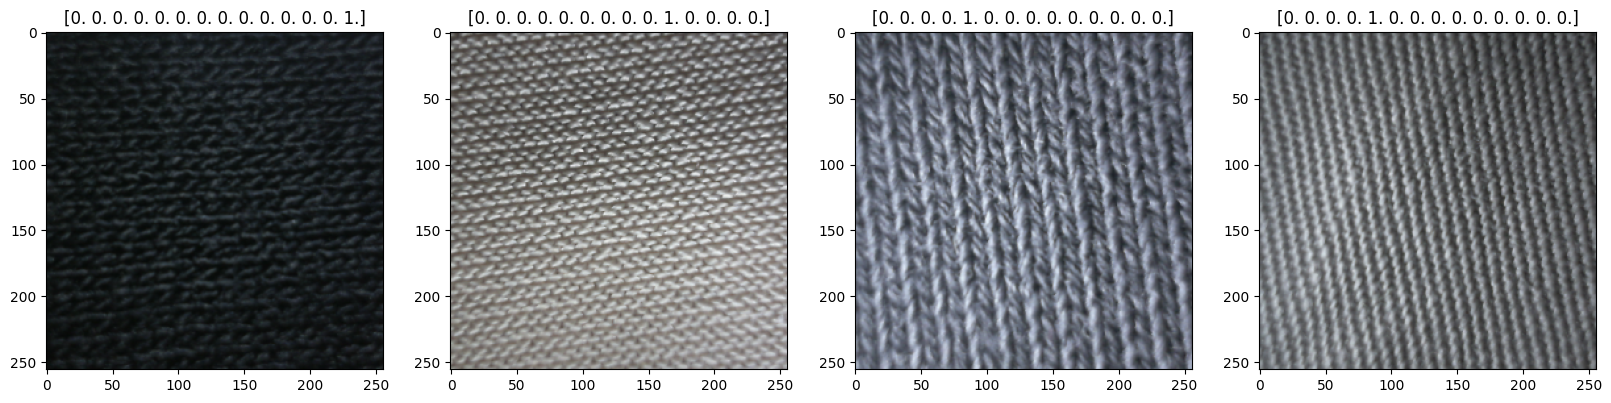

In [26]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [27]:
len(data)

152

In [28]:
print(keras.__version__)

NameError: name 'keras' is not defined

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def apply_augmentation(image, label):
    image = tf.cast(image, tf.float32)
    image = data_augmentation(image)
    # Normalize pixel values to [0, 1]
    image /= 255.0
    return image, label

# Initialize ImageDataGenerator for augmentation
data_augmentation = ImageDataGenerator(
    rotation_range=10,  
    width_shift_range=0.1,  
    height_shift_range=0.1, 
    zoom_range=0.1,  
    horizontal_flip=True,  
    vertical_flip=False  
)

# Load image dataset with data augmentation
data = tf.keras.utils.image_dataset_from_directory(
    'data',
    labels='inferred',
    label_mode='int',  # Or 'categorical' for one-hot encoded labels
    image_size=(256, 256),
    batch_size=32,
    shuffle=True,
    seed=42,
    validation_split=0.2,
    subset='training',
    interpolation='bilinear',
    follow_links=False,
    preprocessing_function=apply_augmentation  # Apply data augmentation
)

# Verify the first batch with data augmentation applied
for images, labels in data.take(1):
    print("Images shape with augmentation applied:", images.shape)
    print("Labels:", labels)

TypeError: image_dataset_from_directory() got an unexpected keyword argument 'preprocessing_function'

In [30]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2)
test_size = int(len(data) * .1)+1

In [31]:
train_size + val_size + test_size

152

In [32]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [33]:
len(test)

16

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [35]:
model = Sequential()

In [36]:
model.add(Conv2D(4, (3,3), 1, activation='relu', input_shape= (256,256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(8, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(4, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu')) 
model.add(Dense(num_classes, activation='relu'))

/Users/tabitalucaciu/UBB INFO ENGL/YEAR 3/SEM 2/Licenta/pythonProject1/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [37]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 4)    │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 4)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 8)    │           296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 4)      │           292 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       921,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 14)             │         3,598 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 926,154 (3.53 MB)

 Trainable params: 926,154 (3.53 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
logdir='logs'

In [40]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [41]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 23s 200ms/step - accuracy: 0.4652 - loss: 1.9625 - val_accuracy: 0.5104 - val_loss: 1.6632
Epoch 2/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 18s 169ms/step - accuracy: 0.5067 - loss: 1.6710 - val_accuracy: 0.5625 - val_loss: 1.5745
Epoch 3/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 19s 178ms/step - accuracy: 0.5507 - loss: 1.5318 - val_accuracy: 0.5958 - val_loss: 1.4057
Epoch 4/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 19s 174ms/step - accuracy: 0.5887 - loss: 1.4031 - val_accuracy: 0.6240 - val_loss: 1.3399
Epoch 5/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 18s 170ms/step - accuracy: 0.6244 - loss: 1.2988 - val_accuracy: 0.6406 - val_loss: 1.3041
Epoch 6/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 19s 173ms/step - accuracy: 0.6660 - loss: 1.2264 - val_accuracy: 0.5969 - val_loss: 1.3196
Epoch 7/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 19s 178ms/step - accuracy: 0.6564 - loss: 1.2024 - val_accuracy: 0.6562 - val_loss: 1.2294
Epoch 8/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 19s 171ms/step - accuracy: 0.6914 - loss: 1

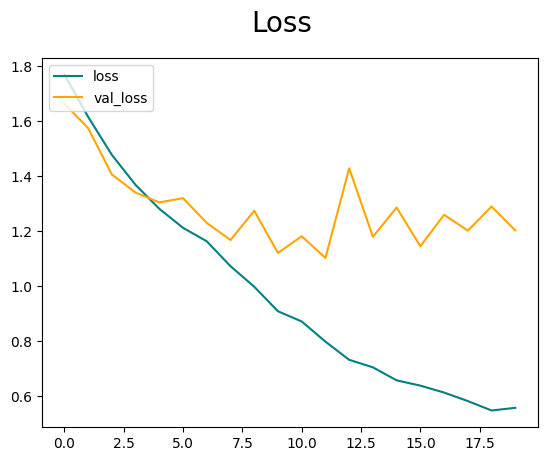

In [42]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

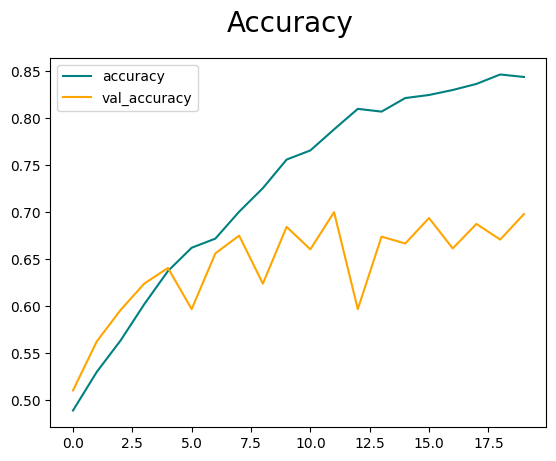

In [43]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [140]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 19s 166ms/step - accuracy: 0.4424 - loss: 2.0089 - val_accuracy: 0.5250 - val_loss: 1.6418
Epoch 2/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 19s 175ms/step - accuracy: 0.5337 - loss: 1.6194 - val_accuracy: 0.5615 - val_loss: 1.5200
Epoch 3/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 19s 174ms/step - accuracy: 0.5685 - loss: 1.4903 - val_accuracy: 0.5292 - val_loss: 1.5080
Epoch 4/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 19s 176ms/step - accuracy: 0.5873 - loss: 1.4185 - val_accuracy: 0.6458 - val_loss: 1.3181
Epoch 5/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 19s 176ms/step - accuracy: 0.6311 - loss: 1.3002 - val_accuracy: 0.6594 - val_loss: 1.2675
Epoch 6/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 19s 176ms/step - accuracy: 0.6574 - loss: 1.2272 - val_accuracy: 0.6552 - val_loss: 1.2574
Epoch 7/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 19s 179ms/step - accuracy: 0.6718 - loss: 1.1511 - val_accuracy: 0.6646 - val_loss: 1.1932
Epoch 8/50
106/106 ━━━━━━━━━━━━━━━━━━━━ 19s 176ms/step - accuracy: 0.6954 - loss: 1

In [61]:
hist.history['val_loss'] 

[0.4455602765083313,
 0.4058208465576172,
 0.43962278962135315,
 0.4031867980957031,
 0.3704507052898407,
 0.3582700192928314,
 0.3474544286727905,
 0.324367493391037,
 0.37122219800949097,
 0.2791961133480072,
 0.35732489824295044,
 0.28204381465911865,
 0.2825689911842346,
 0.4926115572452545,
 0.34165364503860474,
 0.3099270761013031,
 0.30739590525627136,
 0.3360806107521057,
 0.33402472734451294,
 0.3336460292339325,
 0.6325907111167908,
 0.33046528697013855,
 0.31597036123275757,
 0.32613423466682434,
 0.40272313356399536,
 0.4435061812400818,
 0.40994033217430115,
 0.5905195474624634,
 0.30463266372680664,
 0.3991691470146179,
 0.38627514243125916,
 0.39788368344306946,
 0.4055635929107666,
 0.4745698571205139,
 0.380425363779068,
 0.3940204977989197,
 0.5075116753578186,
 0.515992283821106,
 0.4743875563144684,
 0.5155142545700073,
 0.5160320401191711,
 0.4187866151332855,
 0.3304266929626465,
 0.4335106313228607,
 0.44530829787254333,
 0.4650985598564148,
 0.4077441096305847,


In [110]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 184ms/step - accuracy: 0.7065 - loss: 0.5958 - val_accuracy: 0.7828 - val_loss: 0.4977
Epoch 2/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 223ms/step - accuracy: 0.8033 - loss: 0.4685 - val_accuracy: 0.8313 - val_loss: 0.4251
Epoch 3/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 183ms/step - accuracy: 0.8167 - loss: 0.4381 - val_accuracy: 0.8250 - val_loss: 0.4104
Epoch 4/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 226ms/step - accuracy: 0.8249 - loss: 0.4232 - val_accuracy: 0.8687 - val_loss: 0.3733
Epoch 5/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 14s 193ms/step - accuracy: 0.8417 - loss: 0.3763 - val_accuracy: 0.8375 - val_loss: 0.4008
Epoch 6/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 235ms/step - accuracy: 0.8595 - loss: 0.3470 - val_accuracy: 0.8109 - val_loss: 0.5076
Epoch 7/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 215ms/step - accuracy: 0.8765 - loss: 0.3007 - val_accuracy: 0.8516 - val_loss: 0.3676
Epoch 8/50
71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 183ms/step - accuracy: 0.9047 - loss: 0.2290 - val_accu

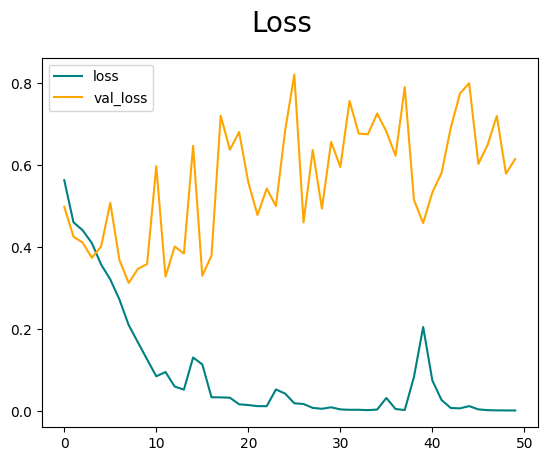

In [111]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

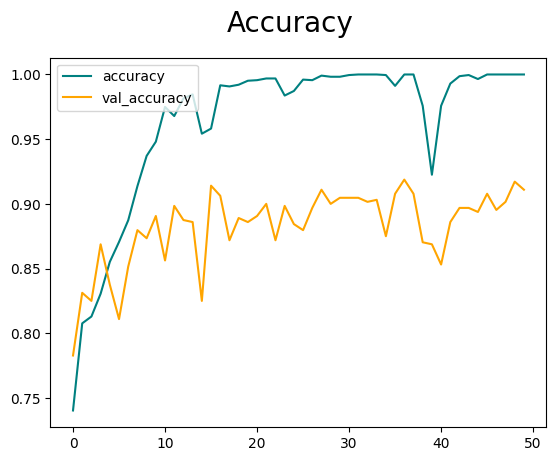

In [112]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Found 5740 files belonging to 22 classes.
Using 4018 files for training.
Found 5740 files belonging to 22 classes.
Using 1722 files for validation.
Epoch 1/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 30s 210ms/step - accuracy: 0.3364 - loss: 2.5310 - val_accuracy: 0.5594 - val_loss: 1.4249 - learning_rate: 1.0000e-04
Epoch 2/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 25s 193ms/step - accuracy: 0.5337 - loss: 1.5296 - val_accuracy: 0.6399 - val_loss: 1.1688 - learning_rate: 1.0000e-04
Epoch 3/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 24s 189ms/step - accuracy: 0.5905 - loss: 1.2944 - val_accuracy: 0.6783 - val_loss: 1.0439 - learning_rate: 1.0000e-04
Epoch 4/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 25s 196ms/step - accuracy: 0.6398 - loss: 1.1274 - val_accuracy: 0.6888 - val_loss: 0.9489 - learning_rate: 1.0000e-04
Epoch 5/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 26s 203ms/step - accuracy: 0.6731 - loss: 1.0196 - val_accuracy: 0.7121 - val_loss: 0.8812 - learning_rate: 1.0000e-04
Epoch 6/100
126/126 ━━━━━━━━━━━━━━━━━━━━ 25s 193ms/s

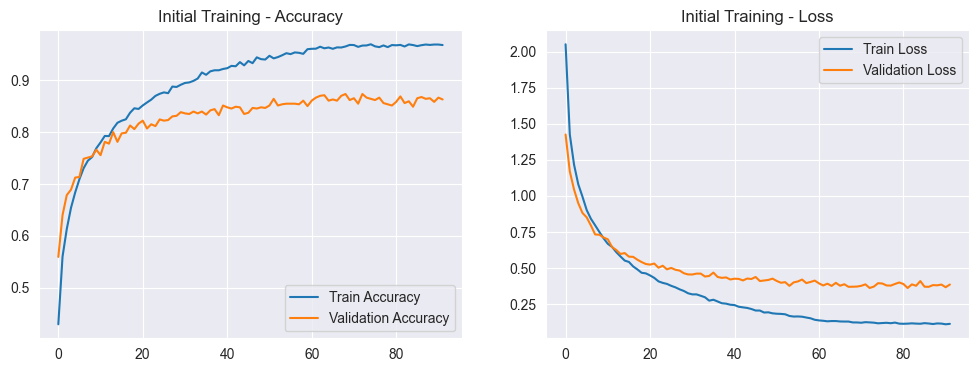

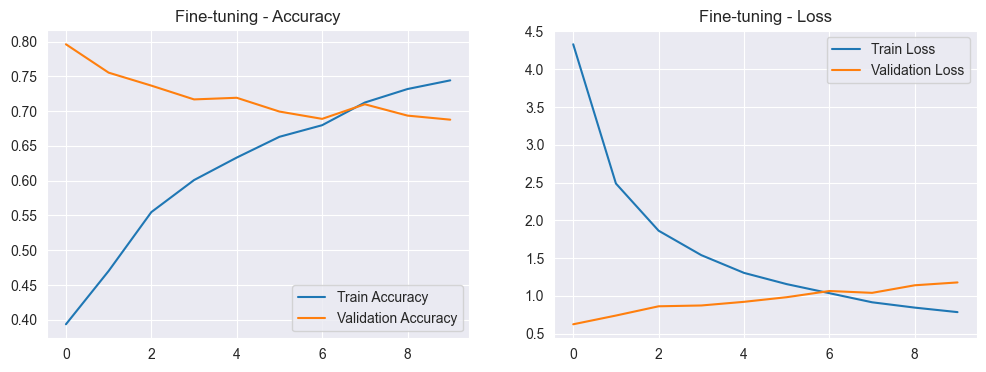

27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 152ms/step - accuracy: 0.7984 - loss: 0.6100
Validation Accuracy: 78.90%
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 163ms/step - accuracy: 0.7931 - loss: 0.6808
Test Accuracy: 77.55%
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1

2024-05-30 17:34:37.099734: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


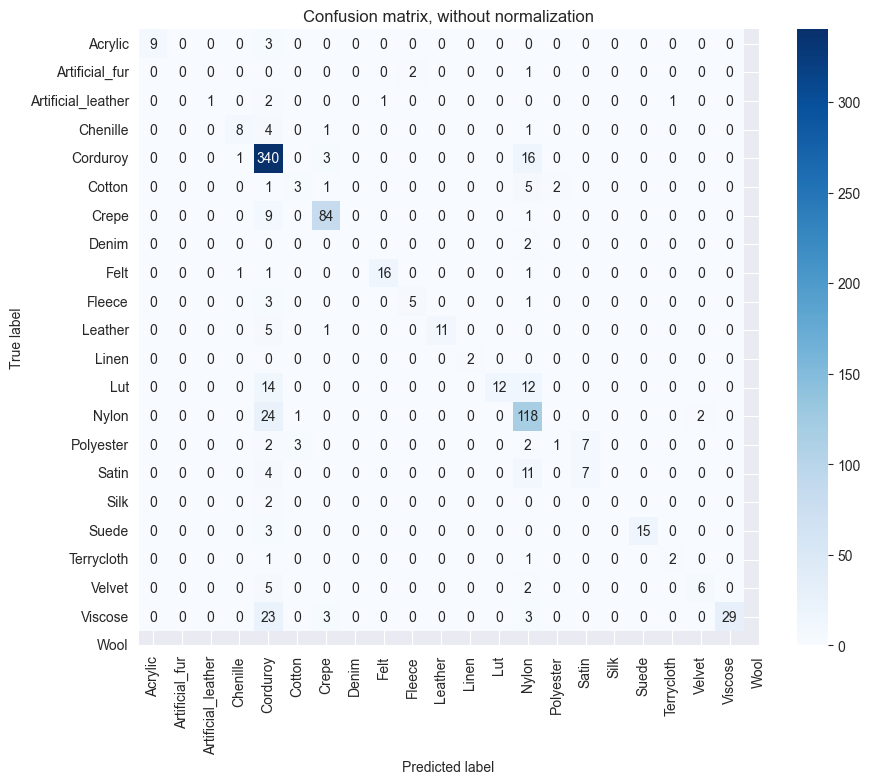

Normalized confusion matrix


ValueError: Unknown format code 'd' for object of type 'float'

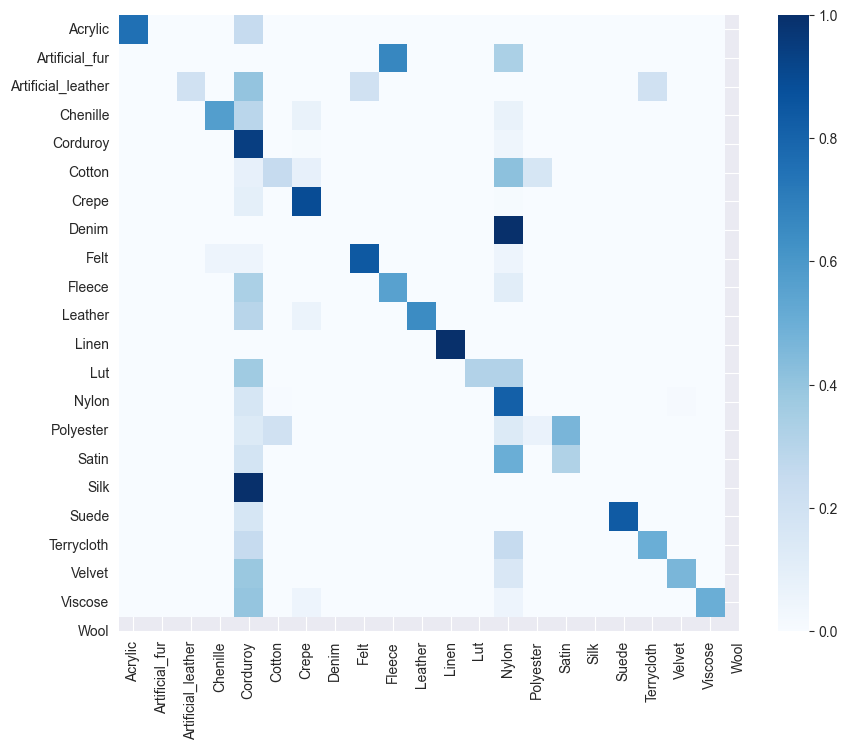

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Load and preprocess the data
data_dir = 'data'

# Load dataset with a validation split = 30%
data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(160, 160),
    batch_size=32,
    seed=42,
    validation_split=0.3,
    subset='training'
)

val_test_data = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(160, 160),
    batch_size=32,
    seed=42,
    validation_split=0.3,
    subset='validation'
)

# Get the class names before mapping
class_names = data.class_names

# Split the val_test_data into validation and test sets
val_batches = tf.data.experimental.cardinality(val_test_data)
test_size = val_batches // 2
val_data = val_test_data.skip(test_size)
test_data = val_test_data.take(test_size)

# Normalize the images
data = data.map(lambda x, y: (x / 255.0, tf.one_hot(y, len(class_names))))
val_data = val_data.map(lambda x, y: (x / 255.0, tf.one_hot(y, len(class_names))))
test_data = test_data.map(lambda x, y: (x / 255.0, tf.one_hot(y, len(class_names))))

# Load pre-trained MobileNetV2 model + higher level layers
weights_path = 'mobilenet_v2_weights_tf_dim_ordering_tf_kernels_1.0_160_no_top.h5'
base_model = MobileNetV2(input_shape=(160, 160, 3), include_top=False, weights=None)
base_model.load_weights(weights_path)
base_model.trainable = False  # Freeze the base model

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Implement Early Stopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train the model
history = model.fit(data, validation_data=val_data, epochs=100, callbacks=[early_stopping, reduce_lr])

# Unfreeze some layers in the base model for fine-tuning
base_model.trainable = True
fine_tune_at = 100  # Fine-tune from this layer onwards

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Continue training the model
history_fine = model.fit(data, validation_data=val_data, epochs=100, callbacks=[early_stopping, reduce_lr])

# Plot the training history
def plot_history(history, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.plot(history.history['accuracy'], label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.legend()
    ax1.set_title(f'{title} - Accuracy')

    ax2.plot(history.history['loss'], label='Train Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.legend()
    ax2.set_title(f'{title} - Loss')

    plt.show()

plot_history(history, 'Initial Training')
plot_history(history_fine, 'Fine-tuning')

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_data)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Generate confusion matrix for the test set
test_data_unbatched = test_data.unbatch()
y_pred = []
y_true = []

for x, y in test_data_unbatched:
    x = tf.expand_dims(x, axis=0)
    pred = model.predict(x)
    y_pred.append(np.argmax(pred))
    y_true.append(np.argmax(y.numpy()))

y_pred = np.array(y_pred)
y_true = np.array(y_true)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
        
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=classes, yticklabels=classes)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cm, classes=class_names, 
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(cm, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')


In [3]:
import os 

# File path for the saved model
model_file_path = 'fabric_classification_model_v3.keras'  # Changed the file name to ensure it doesn't exist

# Check if the file already exists and remove it (optional, since we are using a new name)
if os.path.exists(model_file_path):
    os.remove(model_file_path)

# Save the trained model to a file using the recommended format
model.save(model_file_path)
